In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [8]:
import requests
from bs4 import BeautifulSoup as  bs


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.shape

(569, 6)

In [4]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
import seaborn as sns

In [7]:
import plotly.express as px
fig = px.scatter_3d(df, x='mean_texture', y='mean_radius', z='diagnosis',
              color='mean_area')
fig.show()

In [8]:
import plotly.express as px
fig = px.scatter(df, x="mean_radius", y="mean_area", color="mean_perimeter",
                 size='mean_texture', hover_data=['diagnosis'])
fig.show()

In [9]:
import plotly.graph_objects as go
labels = df['diagnosis']
values = df['mean_area']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,)
fig.show()
labels = df['diagnosis']
values = df['mean_perimeter']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,)
fig.show()
labels = df['diagnosis']
values = df['mean_texture']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    autosize=False,
    width=300,
    height=300,)
fig.show()

In [10]:
import plotly.express as px
fig = px.sunburst(df.sample(frac = 0.1), path=['diagnosis', 'mean_texture'], values='mean_area')
fig.show()

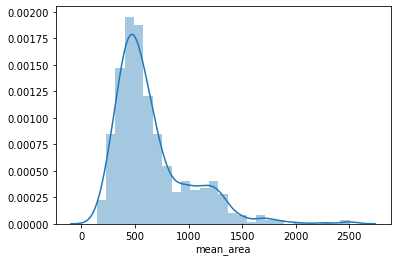

In [11]:
sns.distplot( df["mean_area"] )

In [12]:
x = df.drop(columns=['diagnosis'])
print(x)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]


In [13]:
y = df['diagnosis']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [16]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test, rfc_predict))

Accuracy: 0.9210526315789473


In [17]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)


print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8947368421052632
